<a href="https://colab.research.google.com/github/Nimira43/Neural-Networks-with-Keras/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Deep Neural Networks with Keras

###Import Libraries



1.   MNIST dataset used
2.   Develop a fully connect Neural Network / Artificial Neural Network / Multi-layer Perceptron
3.   Train and evaluate



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

###Importing Dataset

In [14]:
from keras.datasets import mnist

#load dataseet
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#count number of unique train labels
unique, counts = np.unique(y_train, return_counts=True)
print('Train label: ', dict(zip(unique, counts)))

#count number of unique test labels
unique, counts = np.unique(y_test, return_counts=True)
print('Train label: ', dict(zip(unique, counts)))

Train label:  {0: 5923, 1: 6742, 2: 5958, 3: 6131, 4: 5842, 5: 5421, 6: 5918, 7: 6265, 8: 5851, 9: 5949}
Train label:  {0: 980, 1: 1135, 2: 1032, 3: 1010, 4: 982, 5: 892, 6: 958, 7: 1028, 8: 974, 9: 1009}


###Data visualisation

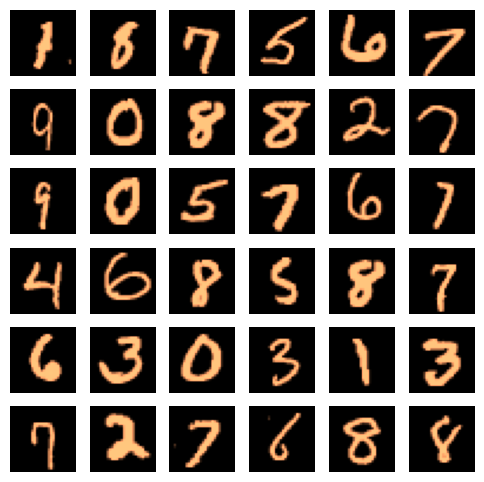

In [15]:
indice = np.random.randint(0, x_train.shape[0], size=36)
imgs = x_train[indice]
labels  = y_train[indice]

plt.figure(figsize=(6, 6))
for i in range(len(indice)):
    plt.subplot(6, 6, i + 1)
    img = imgs[i]
    plt.imshow(img, cmap='copper')
    plt.axis('off')
plt.show()
plt.savefig('mnist_image.png')
plt.close('all')

###Model Designing

In [16]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout


In [17]:
num_labels = len(np.unique(y_train))

In [21]:
!pip install np.utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np.utils: filename=np_utils-0.6.0-py3-none-any.whl size=56437 sha256=f94efbb9e74050a6dc62c05cf37238935e95c966b4f1b28193070c99228243ed
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np.utils


In [24]:
!pip install keras.utils

  Preparing metadata (setup.py) ... done
  Created wheel for keras.utils: filename=keras_utils-1.0.13-py3-none-any.whl size=2632 sha256=c22d04f5de5f3c789b50887876861d5811689c98d7b5b0dee2022b9ee7112e84
  Stored in directory: /root/.cache/pip/wheels/5c/c0/b3/0c332de4fd71f3733ea6d61697464b7ae4b2b5ff0300e6ca7a
Successfully built keras.utils


In [29]:
from tensorflow.keras.utils import to_categorical

# convert to one hot vector
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [32]:
# Image dimensions
image_size = x_train.shape[1]
input_size = image_size * image_size
input_size

784

In [33]:
# Resize and normalise
x_train = np.reshape(x_train, [-1, input_size])
x_train = x_train.astype('float32') / 255
x_train = np.reshape(x_test, [-1, input_size])
x_train = x_test.astype('float32') / 255

In [34]:
batch_size = 128
hidden_units = 256


In [35]:
from keras.models import Sequential
from keras.layers import Dense, Activation